In [85]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf
print(tf.__version__)


from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Input
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import gensim

from gensim.models import word2vec,KeyedVectors

##COlab Drive mount
from google.colab import drive

from tensorflow.keras.callbacks import ModelCheckpoint

from wordcloud import WordCloud

import zipfile

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import transformers

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

from transformers import BertTokenizer, TFBertForSequenceClassification   


2.6.0


In [3]:
!pip3 install --quiet transformers

     |████████████████████████████████| 2.8 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 78.0 MB/s 
     |████████████████████████████████| 636 kB 76.1 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 


In [5]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

pd.options.display.max_colwidth =5000

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

# **1. Read and explore the data**

In [86]:
#Read the data from Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

sarcasism_df =pd.read_json('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json',
                           lines=True)

In [87]:
sarcasism_df.head(3)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html


In [88]:
sarcasism_df.shape

(28619, 3)

In [89]:
sarcasism_df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [90]:
sarcasism_df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [91]:
sarcasism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


# **Observations:**
-  There are 28619 Sarcastic News.
-  The Dataset is not biased as ~14985 items are not sarcastics and ~13634 Items are sarcastics.
- There are no null elements in the Dataset.

# **2.Retain relevant columns**

In [92]:
relavant_sarcasism_df = sarcasism_df.copy(deep=True)

In [93]:
relavant_sarcasism_df.drop(columns='article_link',inplace=True)

In [94]:
relavant_sarcasism_df.head(3)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clock of hair loss
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality"
2,0,eat your veggies: 9 deliciously different recipes


# **3. Get length of each sentence**

In [95]:
relavant_sarcasism_df['sen_len'] = relavant_sarcasism_df['headline'].apply(lambda x : len(x.split(" ")))

In [96]:
relavant_sarcasism_df.head(3)

,is_sarcastic,headline,sen_len
0,1,thirtysomething scientists unveil doomsday clock of hair loss,8
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",13
2,0,eat your veggies: 9 deliciously different recipes,7


In [97]:
relavant_sarcasism_df.sort_values(by='sen_len',ascending=False).head(3)

,is_sarcastic,headline,sen_len
7302,1,"hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet",151
24815,1,"elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",39
23598,0,"occasionally you realize someone you thought was a dear friend is actually a foe, their true character finally revealed. but how do you forgive the unforgivable? here are my 10 steps to handling betrayal with elegance and grace.",38


In [98]:
relavant_sarcasism_df[['sen_len','is_sarcastic']].groupby(by='is_sarcastic').max()

,sen_len
is_sarcastic,
0,38
1,151


In [99]:
relavant_sarcasism_df['sen_len'].describe()

count   28619.0000000
mean       10.0518537
std         3.3909385
min         2.0000000
25%         8.0000000
50%        10.0000000
75%        12.0000000
max       151.0000000
Name: sen_len, dtype: float64

# **Observations:**

- The max sentence length for non sarcastic article is 38 words long.
- Max Sentence length for sarcastic article is 151 words long.

# **4. Define parameters**

In [100]:
# Removing the HTML Tags if any

from bs4 import BeautifulSoup

In [101]:
def remove_html_tags(text):
  soup = BeautifulSoup(text,"html.parser")
  stripped_text = soup.get_text()
  return stripped_text

In [102]:
relavant_sarcasism_df['headline'] = relavant_sarcasism_df['headline'].apply(lambda x: remove_html_tags(x))

In [103]:
import unicodedata
def remove_accented_chars(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [104]:
relavant_sarcasism_df['headline'] = relavant_sarcasism_df['headline'].apply(lambda x: remove_accented_chars(x))

In [105]:
relavant_sarcasism_df.head(3)

,is_sarcastic,headline,sen_len
0,1,thirtysomething scientists unveil doomsday clock of hair loss,8
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",13
2,0,eat your veggies: 9 deliciously different recipes,7


In [106]:
# Removing unwanted Characters:

relavant_sarcasism_df['headline'] = relavant_sarcasism_df['headline'].apply(lambda x : re.sub('[^a-zA-Z\s]','',x,re.I|re.A))

In [107]:
relavant_sarcasism_df.head(5)

,is_sarcastic,headline,sen_len
0,1,thirtysomething scientists unveil doomsday clock of hair loss,8
1,0,dem rep totally nails why congress is falling short on gender racial equality,13
2,0,eat your veggies deliciously different recipes,7
3,1,inclement weather prevents liar from getting to work,8
4,1,mother comes pretty close to using word streaming correctly,9


In [108]:
## EDA on the Headlines from Github -->  https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

tokenizer_2=Tokenizer()
tokenizer_2.fit_on_texts(relavant_sarcasism_df.headline)

In [109]:
word_counts_2=pd.DataFrame(tokenizer_2.word_counts.items(),columns=['words','counts']).sort_values(by='counts',ascending=False)

[]

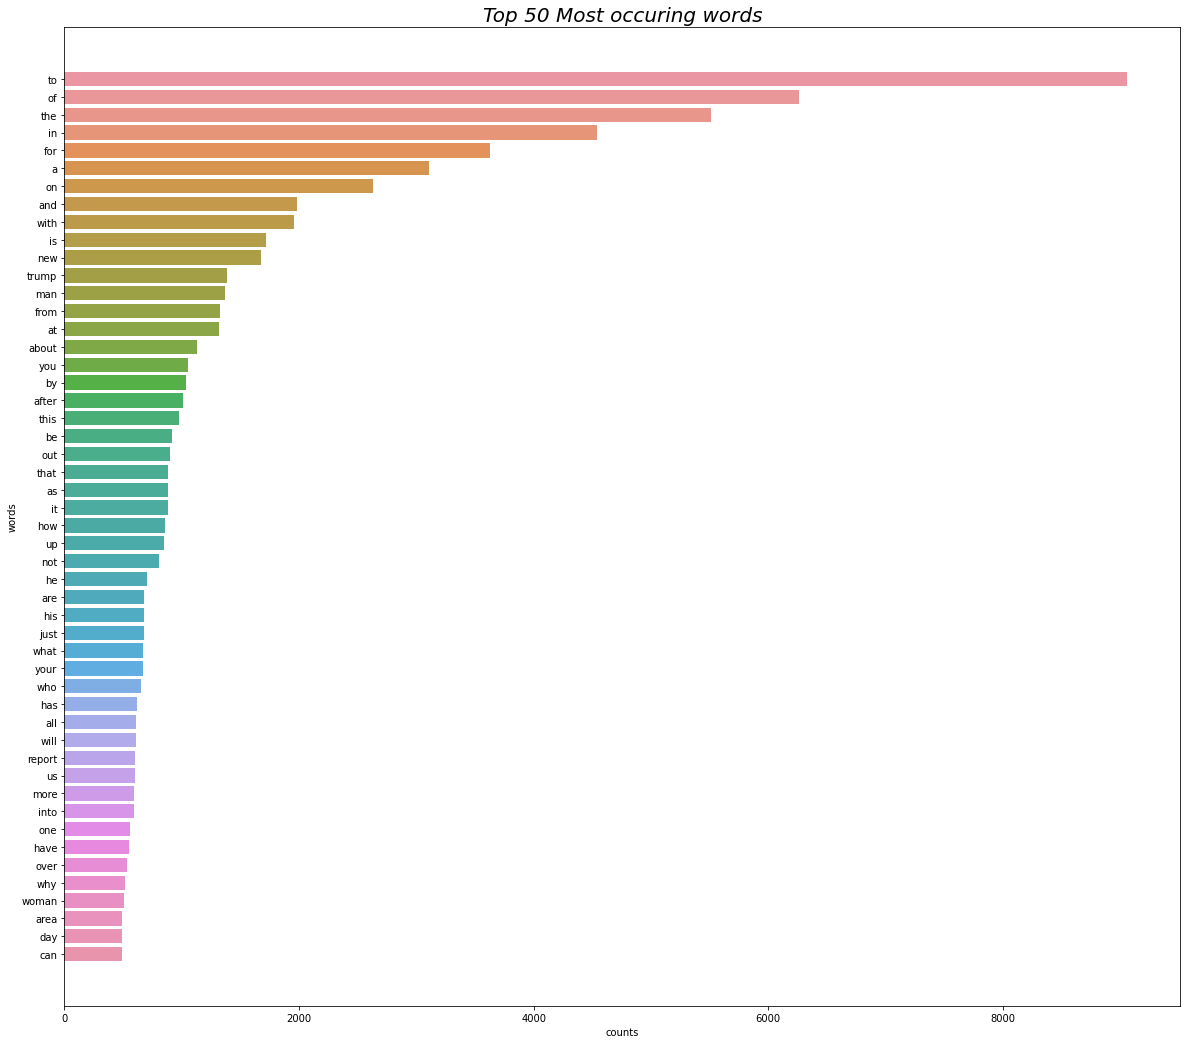

In [111]:
top_50_words_1=word_counts_2.iloc[:50]
plt.figure(figsize=(20,18))
sns.barplot(data=top_50_words_1,x='counts',y='words')
plt.title('Top 50 Most occuring words',fontdict={'size':20,'style':'italic'})
plt.plot()

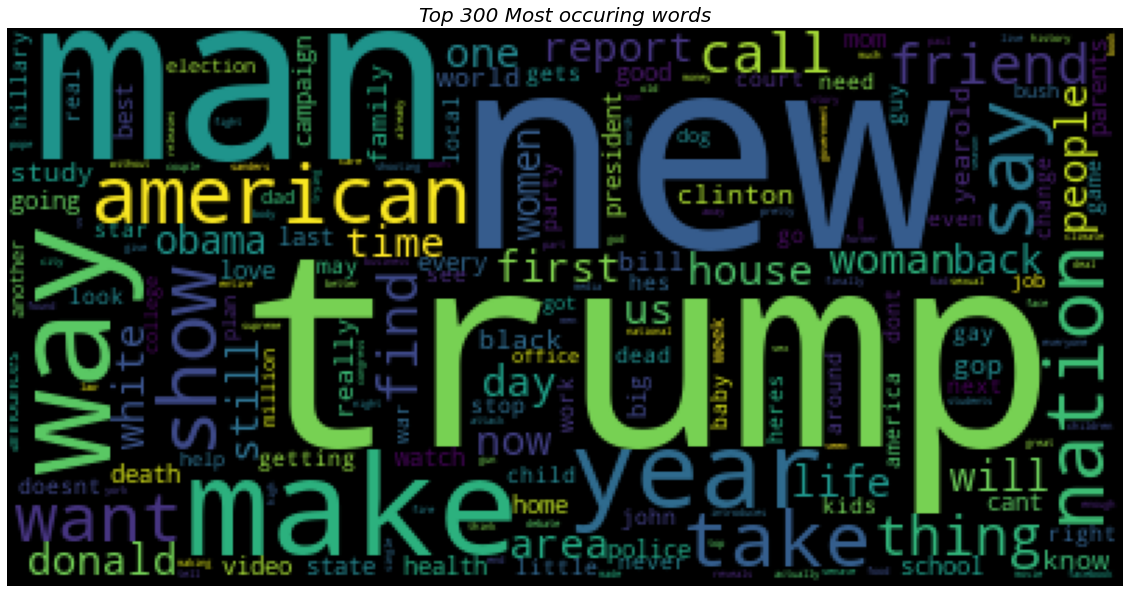

In [112]:
top_300_words_2=word_counts_2.words[:300]
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in top_300_words_2))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.title('Top 300 Most occuring words',fontdict={'size':20,'style':'italic'})
plt.imshow(wc)

# **Observations from the above EDA on https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection**

 - From the above EDA we can see the top repeated words are trump,way,obama,clinto,donald ets.


In [ ]:
##Defining the HyperParams

max_features = 10000
maxlen = 150
embedding_size = 50

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(relavant_sarcasism_df['headline']))
x = tokenizer.texts_to_sequences(relavant_sarcasism_df['headline'])

In [ ]:
len(x)

28619

In [ ]:
print(len(x[0]))
print(len(x[1]))
print(len(x[2]))

7
13
4


In [ ]:
#Here we are creating the features and Labels
from tensorflow.keras.preprocessing.sequence import pad_sequences 

X = pad_sequences(x,maxlen = maxlen)

In [ ]:
Y = np.array(relavant_sarcasism_df['is_sarcastic'])

# **5. Get indices for words**

In [ ]:
num_words = len(tokenizer.word_index)+1

In [ ]:
list(tokenizer.word_index.items())[:20]

[('to', 1),
 ('of', 2),
 ('the', 3),
 ('in', 4),
 ('for', 5),
 ('a', 6),
 ('on', 7),
 ('and', 8),
 ('with', 9),
 ('is', 10),
 ('new', 11),
 ('trump', 12),
 ('man', 13),
 ('from', 14),
 ('at', 15),
 ('about', 16),
 ('you', 17),
 ('by', 18),
 ('after', 19),
 ('this', 20)]

# **7. Get vocabulary size**

In [ ]:
# the total words in the headline column
print(num_words)

28773


# **8. Create a weight matrix using GloVe embeddings**

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Using glove.6B.50d.txt
embedding_file = '/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Lab/glove.6B.50d.txt'

In [ ]:
embeddings ={}

for o in open(embedding_file):
  word = o.split(" ")[0]
  embd = o.split(" ")[1:]
  embd = np.asarray(embd,dtype='float32')
  embeddings[word]=embd

In [ ]:
len(embeddings)

400000

In [ ]:
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector 

# **6. Create features and labels**

In [ ]:
#In Question-4 we ahve created the new features using padding and labels are been created
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((22895, 150), (5724, 150))

# **9. Define and compile a Bidirectional LSTM model.**

In [ ]:
#Initialize Bidirectional LSTM model for the Dataset collected from  https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

tf.keras.backend.clear_session()
model_sentiment = tf.keras.Sequential()

In [ ]:
# Embedding Size =50 and the embedding_matrix was built from Glove-50d, Max length has been set as 150 which is the maximum sentence 
#length of the sarcastic Article
model_sentiment.add(tf.keras.layers.Embedding(num_words,
                                    50, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=maxlen) #Number of words in each review
          )

In [ ]:
model_sentiment.output

<KerasTensor: shape=(None, 150, 50) dtype=float32 (created by layer 'embedding')>

In [ ]:
model_sentiment.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True),merge_mode='sum'))

In [ ]:
model_sentiment.output

<KerasTensor: shape=(None, 150, 200) dtype=float32 (created by layer 'bidirectional')>

In [ ]:
model_sentiment.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,return_sequences=True),merge_mode='concat'))

In [ ]:
model_sentiment.output

<KerasTensor: shape=(None, 150, 300) dtype=float32 (created by layer 'bidirectional_1')>

In [ ]:
model_sentiment.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100),merge_mode='mul'))

In [ ]:
model_sentiment.output

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'bidirectional_2')>

In [ ]:
model_sentiment.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           1438650   
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 200)          401600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 300)          421200    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               320800    
Total params: 2,582,250
Trainable params: 1,143,600
Non-trainable params: 1,438,650
_________________________________________________________________


In [ ]:
model_sentiment.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_sentiment.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 50)           1438650   
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 200)          401600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 300)          421200    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,582,351
Trainable params: 1,143,701
Non-trainable params: 1,438,650
_________________________________________________________________


In [ ]:
#Compile the model
model_sentiment.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **10. Fit the model and check the validation accuracy**

In [ ]:
check_point_1 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
model_sentiment.fit( x=X_train, y=Y_train, batch_size=32, epochs=30, validation_split=0.3,callbacks=[callback_1,check_point_1])

Epoch 1/30
501/501 [==============================] - 977s 2s/step - loss: 0.5899 - accuracy: 0.6838 - val_loss: 0.4879 - val_accuracy: 0.7666


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/30
501/501 [==============================] - 956s 2s/step - loss: 0.6499 - accuracy: 0.5799 - val_loss: 0.6893 - val_accuracy: 0.5494
Epoch 3/30
501/501 [==============================] - 957s 2s/step - loss: 0.6483 - accuracy: 0.6323 - val_loss: 0.6472 - val_accuracy: 0.6363
Epoch 4/30
501/501 [==============================] - 967s 2s/step - loss: 0.6398 - accuracy: 0.6368 - val_loss: 0.6030 - val_accuracy: 0.6806
Epoch 5/30
501/501 [==============================] - 1007s 2s/step - loss: 0.4962 - accuracy: 0.7643 - val_loss: 0.4590 - val_accuracy: 0.7835


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 6/30
501/501 [==============================] - 994s 2s/step - loss: 0.4027 - accuracy: 0.8194 - val_loss: 0.4155 - val_accuracy: 0.8071


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 7/30
501/501 [==============================] - 1005s 2s/step - loss: 0.3642 - accuracy: 0.8385 - val_loss: 0.4259 - val_accuracy: 0.7992
Epoch 8/30
501/501 [==============================] - 1015s 2s/step - loss: 0.3329 - accuracy: 0.8560 - val_loss: 0.3963 - val_accuracy: 0.8282


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 9/30
501/501 [==============================] - 1019s 2s/step - loss: 0.3074 - accuracy: 0.8692 - val_loss: 0.3869 - val_accuracy: 0.8329


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 10/30
501/501 [==============================] - 1023s 2s/step - loss: 0.2805 - accuracy: 0.8826 - val_loss: 0.3904 - val_accuracy: 0.8349
Epoch 11/30
501/501 [==============================] - 1018s 2s/step - loss: 0.2584 - accuracy: 0.8939 - val_loss: 0.4160 - val_accuracy: 0.8362
Epoch 12/30
501/501 [==============================] - 1008s 2s/step - loss: 0.2290 - accuracy: 0.9076 - val_loss: 0.4695 - val_accuracy: 0.8185
Epoch 13/30
501/501 [==============================] - 1012s 2s/step - loss: 0.2236 - accuracy: 0.9115 - val_loss: 0.4140 - val_accuracy: 0.8313
Epoch 14/30
501/501 [==============================] - 1009s 2s/step - loss: 0.1882 - accuracy: 0.9267 - val_loss: 0.4693 - val_accuracy: 0.8270
Epoch 15/30
501/501 [==============================] - 1005s 2s/step - loss: 0.1584 - accuracy: 0.9391 - val_loss: 0.5012 - val_accuracy: 0.8298
Epoch 16/30
501/501 [==============================] - 1027s 2s/step - loss: 0.1361 - accuracy: 0.9493 - val_loss: 0.5113 - val_ac

In [ ]:
y_prediction = model_sentiment.predict(X_test)

In [ ]:

for i in range(10):
  print("Original Sentiments review - ",Y_test[i])

  if(y_prediction[i]*100 >65):
    print("Predicted Sentiments review is Sarcastic - ",y_prediction[i])
  else:
    print("Predicted Sentiments review is Non Sarcastic - ",y_prediction[i])

  print("\n")


Original Sentiments review -  0
Predicted Sentiments review is Sarcastic -  [0.9506295]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.83707464]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9927183]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9721879]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.04861465]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.07010791]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.01051506]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.99149257]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.96666646]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9286269]




In [ ]:
model_sentiment.evaluate(X_test, Y_test)

179/179 [==============================] - 78s 435ms/step - loss: 0.3742 - accuracy: 0.8354


[0.37423473596572876, 0.8354297876358032]

In [ ]:
y_prediction[:30]

array([[0.9506295 ],
       [0.83707464],
       [0.9927183 ],
       [0.9721879 ],
       [0.04861465],
       [0.07010791],
       [0.01051506],
       [0.99149257],
       [0.96666646],
       [0.9286269 ],
       [0.39868653],
       [0.7447109 ],
       [0.6269885 ],
       [0.05762529],
       [0.00930408],
       [0.8769188 ],
       [0.01006642],
       [0.8478186 ],
       [0.01119187],
       [0.0493367 ],
       [0.61388934],
       [0.00982189],
       [0.01179016],
       [0.92551416],
       [0.26171452],
       [0.6076192 ],
       [0.94786984],
       [0.07105169],
       [0.01480117],
       [0.18720108]], dtype=float32)

In [ ]:
y_preds = np.where(y_prediction>0.65,1,0)

In [ ]:
y_preds[:30]

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(Y_test,y_preds))

Test Accuracy :  0.8375262054507338


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test,y_preds))

[[2654  341]
 [ 589 2140]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_preds,
                            target_names =['Non Sarcastic', 'Sarcastic']))

               precision    recall  f1-score   support

Non Sarcastic       0.82      0.89      0.85      2995
    Sarcastic       0.86      0.78      0.82      2729

     accuracy                           0.84      5724
    macro avg       0.84      0.84      0.84      5724
 weighted avg       0.84      0.84      0.84      5724



# **Observations from BiDirectional LSTM on Glove 50 Word Embeddings:**

  - Accuracy for Training is 97% and Testing is 83% with the input shape as 150 which is the maximum Sarcastic length.
  -  On Seeing the Confusion Matrix


 |Total |Actual Non Sarcastic |Actual Sarcastic| 
 | --- | --- | --- | 
 |Predicted Non Sarcastic | 2654   |341   |
 |Predicted Sarcastic |  589   |2140   |


 - There are 3243 actual Non sarcastic headlines but only 2654 items are predicted as Non Sarcastic with the precision on 82%.

 - There are 2481 headlines as  sarcastic but only 2140 are predicted as sarcastic with the precision of 86%.

 - There are 2995 headlines are predicted as Non Sarcastic but only 2654 predictions are actually Non sarcastic with the recall of 89%.

 -  There are 2729 headlines are predicted as Sarcastic but only 2140 are predicted as actually sarcastic with the recall of 78%.

 - The above model is a good for Sarcasim Prediction.
 

# **1. Read and explore the data from Kaggle**

In [8]:
#Reading the Dataset from Kaggle with More number of records

data1=pd.read_json('/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Assignments/Sarcasm_Headlines_Dataset.json.zip',lines=True)
data1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


In [9]:
data2=pd.read_json('/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Assignments/Sarcasm_Headlines_Dataset_v2.json.zip',lines=True)
data2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546


In [10]:
sarcastic_kaggle_data=pd.concat([data1,data2],axis=0,ignore_index=True)

In [11]:
sarcastic_kaggle_data.head(3)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1


In [12]:
sarcastic_kaggle_data.shape

(55328, 3)

In [13]:
sarcastic_kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55328 entries, 0 to 55327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [14]:
sarcastic_kaggle_data['is_sarcastic'].value_counts()

0    29970
1    25358
Name: is_sarcastic, dtype: int64

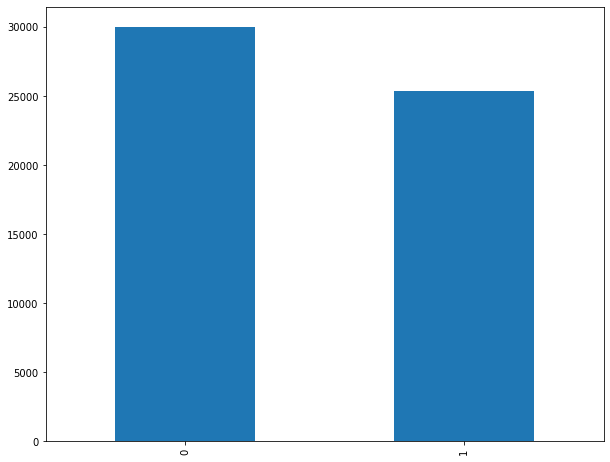

In [15]:
plt.figure(figsize=(10,8))
sarcastic_kaggle_data['is_sarcastic'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [16]:
sarcastic_kaggle_data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

# **Observations:**

 - The total records are 55328, with 29970 are non sarcastic and 25358 are sarcastic.

 - The dataset is not biased.

 - There are no null headlines.

# **2.Retain relevant columns**

In [17]:
sarcastic_kaggle_df = sarcastic_kaggle_data.copy(deep=True)

In [18]:
sarcastic_kaggle_df.drop(columns='article_link',inplace=True)

In [19]:
sarcastic_kaggle_df.head(3)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1


# **3. Get length of each sentence**

In [20]:
sarcastic_kaggle_df['headline_length'] = sarcastic_kaggle_df['headline'].apply(lambda x : len(x.split(" ")))

In [21]:
sarcastic_kaggle_df.head(3)

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14


In [22]:
sarcastic_kaggle_df.sort_values(by='headline_length',ascending=False).head(3)

,headline,is_sarcastic,headline_length
34011,"hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet",1,151
51524,"elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1,39
15247,"elmore leonard, modern prose master, noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words, unfortunately and sadly expired this gloomy tuesday at the age of 87 years old",1,39


In [23]:
sarcastic_kaggle_df[['headline_length','is_sarcastic']].groupby(by='is_sarcastic').max()

,headline_length
is_sarcastic,
0,38
1,151


In [24]:
sarcastic_kaggle_df['headline_length'].describe()

count   55328.0000000
mean        9.9533690
std         3.2886667
min         2.0000000
25%         8.0000000
50%        10.0000000
75%        12.0000000
max       151.0000000
Name: headline_length, dtype: float64

# **Observations:**

- The max sentence length for non sarcastic article is 38 words long.
- Max Sentence length for sarcastic article is 151 words long.
- We can see 75% article has the length of 12, So we can have the input length for our LSTM within 20

# **4. Define parameters**

In [25]:
# Removing the HTML Tags if any

from bs4 import BeautifulSoup

In [26]:
def remove_html_tags(text):
  soup = BeautifulSoup(text,"html.parser")
  stripped_text = soup.get_text()
  return stripped_text

In [27]:
sarcastic_kaggle_df['headline'] = sarcastic_kaggle_df['headline'].apply(lambda x: remove_html_tags(x))

In [28]:
def remove_accented_chars(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [29]:
import unicodedata

sarcastic_kaggle_df['headline'] = sarcastic_kaggle_df['headline'].apply(lambda x: remove_accented_chars(x))

In [30]:
sarcastic_kaggle_df.head(3)

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,12
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,14
2,mom starting to fear son's web series closest thing she will have to grandchild,1,14


In [31]:
# Removing unwanted Characters:

sarcastic_kaggle_df['headline'] = sarcastic_kaggle_df['headline'].apply(lambda x : re.sub('[^a-zA-Z\s]','',x,re.I|re.A))

In [32]:
sarcastic_kaggle_df.head(5)

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret black code for minority shoppers,0,12
1,the roseanne revival catches up to our thorny political mood for better and worse,0,14
2,mom starting to fear sons web series closest thing she will have to grandchild,1,14
3,boehner just wants wife to listen not come up with alternative debtreduction ideas,1,13
4,jk rowling wishes snape happy birthday in the most magical way,0,11


In [ ]:
##Defining the HyperParams

max_features = 10000
maxlen = 20
embedding_size = 50

In [ ]:
tokenizer_1=Tokenizer()
tokenizer_1.fit_on_texts(sarcastic_kaggle_df.headline)

In [ ]:
word_counts=pd.DataFrame(tokenizer_1.word_counts.items(),columns=['words','counts']).sort_values(by='counts',ascending=False)

[]

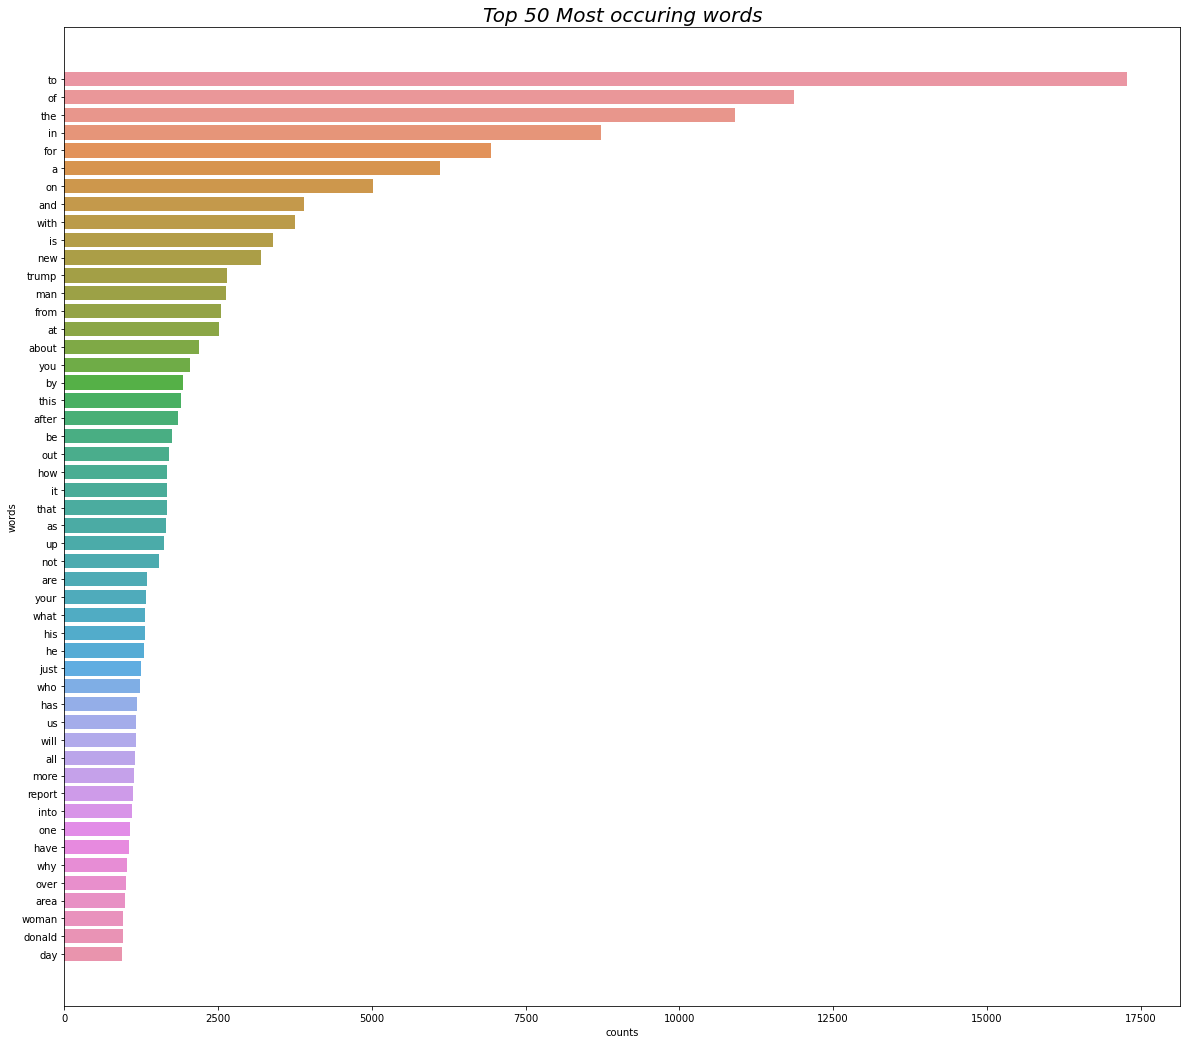

In [ ]:
top_50_words=word_counts.iloc[:50]
plt.figure(figsize=(20,18))
sns.barplot(data=top_50_words,x='counts',y='words')
plt.title('Top 50 Most occuring words',fontdict={'size':20,'style':'italic'})
plt.plot()

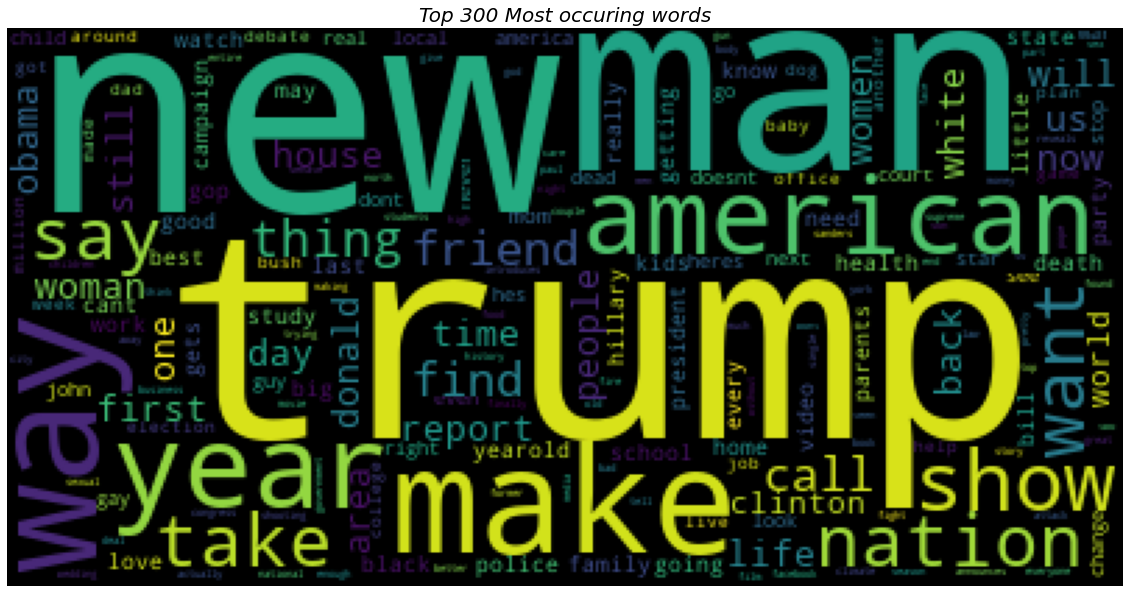

In [ ]:
top_300_words=word_counts.words[:300]
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in top_300_words))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.title('Top 300 Most occuring words',fontdict={'size':20,'style':'italic'})
plt.imshow(wc)

In [ ]:
# Padding  to create more features and labels below.
x=tokenizer_1.texts_to_sequences(sarcastic_kaggle_df.headline)
X_1=pad_sequences(x,maxlen=20)

In [ ]:
Y_1 = np.array(sarcastic_kaggle_df['is_sarcastic'])

# **Observations:**

 - From the above EDA we can see the top 300 words used in the News headlines as TRUMP,AMERICAN,YEAR,OBAMA,NATION,CLINTON.

# **5. Get indices for words**

In [ ]:
num_words_1 = len(tokenizer_1.word_index)+1

In [ ]:
#Top 20 Indicies of words in the Heardlines

list(tokenizer_1.word_index.items())[:20]

[('to', 1),
 ('of', 2),
 ('the', 3),
 ('in', 4),
 ('for', 5),
 ('a', 6),
 ('on', 7),
 ('and', 8),
 ('with', 9),
 ('is', 10),
 ('new', 11),
 ('trump', 12),
 ('man', 13),
 ('from', 14),
 ('at', 15),
 ('about', 16),
 ('you', 17),
 ('by', 18),
 ('this', 19),
 ('after', 20)]

# **7. Get vocabulary size**

In [ ]:
# the total words in the headline column
print(num_words_1)

28773


# **8. Create a weight matrix using GloVe embeddings**

In [ ]:
##Using glove.6B.300d.txt
embedding_zip_file = '/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Assignments/glove.6B.300d.txt.zip'

In [ ]:
zf = zipfile.ZipFile(embedding_zip_file,"r")

In [ ]:
embeddings_1 ={}

for name in zf.namelist():
    data = str(zf.read(name)).split(" ")
    for o in data:
      word = o.split(" ")[0]
      embd = o.split(" ")[1:]
      embd = np.asarray(embd,dtype='float32')
      embeddings_1[word]=embd

In [ ]:
len(embeddings_1)

1116766

In [ ]:
embedding_matrix_1 = np.zeros((num_words_1, embedding_size))

for word, i in tokenizer_1.word_index.items():
  embedding_vector = embeddings_1.get(word)
  if embedding_vector is not None:
    embedding_matrix_1[i] = embedding_vector 

# **6. Create features and labels**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_1,Y_1, test_size=0.2,random_state=42)

In [ ]:
X_train_1.shape, X_test_1.shape

((44262, 20), (11066, 20))

# **9. Define and compile a Bidirectional LSTM model.**

In [ ]:
#Initialize model
tf.keras.backend.clear_session()
model_sentiment_kaggle = tf.keras.Sequential()

In [ ]:
model_sentiment_kaggle.add(tf.keras.layers.Embedding(num_words_1,
                                    embedding_size, #Embedding size
                                    weights=[embedding_matrix_1],
                                    trainable=False,
                                    input_length=maxlen) #Number of words in each review
          )

In [ ]:
model_sentiment_kaggle.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True),merge_mode='sum'))
model_sentiment_kaggle.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,return_sequences=True),merge_mode='concat'))
model_sentiment_kaggle.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100),merge_mode='mul'))

In [ ]:
model_sentiment_kaggle.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile the model
model_sentiment_kaggle.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **10. Fit the model and check the validation accuracy**

In [ ]:
check_point_2 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights=True,mode = 'min')
history_2 = model_sentiment_kaggle.fit( x=X_train_1, y=Y_train_1, batch_size=32, epochs=10, validation_split=0.3,callbacks=[callback_2,check_point_2])

Epoch 1/10
969/969 [==============================] - 296s 292ms/step - loss: 0.6897 - accuracy: 0.5460 - val_loss: 0.6901 - val_accuracy: 0.5389


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/10
969/969 [==============================] - 273s 281ms/step - loss: 0.6888 - accuracy: 0.5466 - val_loss: 0.6903 - val_accuracy: 0.5389
Epoch 3/10
969/969 [==============================] - 273s 282ms/step - loss: 0.6888 - accuracy: 0.5466 - val_loss: 0.6903 - val_accuracy: 0.5389


In [ ]:
model_sentiment_kaggle.evaluate(X_test_1, Y_test_1)

346/346 [==============================] - 24s 69ms/step - loss: 0.6915 - accuracy: 0.5312


[0.6914700269699097, 0.5311765670776367]

In [ ]:
y_prediction_1 = model_sentiment_kaggle.predict(X_test_1)

In [ ]:

for i in range(10):
  print("Original Sentiments review - ",Y_test_1[i])

  if(y_prediction_1[i]*100 >65):
    print("Predicted Sentiments review is Sarcastic - ",y_prediction_1[i])
  else:
    print("Predicted Sentiments review is Non Sarcastic - ",y_prediction_1[i])

  print("\n")


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45726624]




In [ ]:
y_preds_1 = np.where(y_prediction_1>0.65,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(Y_test_1,y_preds_1))

Test Accuracy :  0.531176576902223


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test_1,y_preds_1))

[[5878    0]
 [5188    0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1,y_preds_1,
                            target_names =['Non Sarcastic', 'Sarcastic']))

               precision    recall  f1-score   support

Non Sarcastic       0.53      1.00      0.69      5878
    Sarcastic       0.00      0.00      0.00      5188

     accuracy                           0.53     11066
    macro avg       0.27      0.50      0.35     11066
 weighted avg       0.28      0.53      0.37     11066



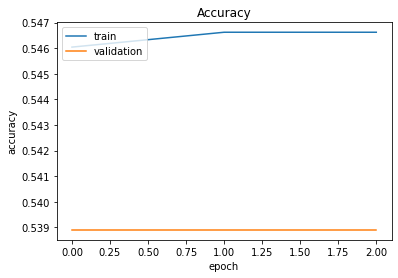

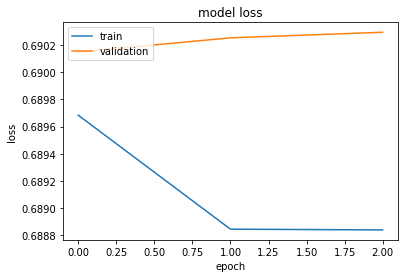

In [ ]:
plt.plot(history_2.history['accuracy'])  
plt.plot(history_2.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_2.history['loss'])  
plt.plot(history_2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations from Bi Directional LSTM from Kaggle Dataset with Glove 300d:**

 - Training accuracy is 54% and 53%.
 - Prediction is poor.
 - From the Confusion Matrix
 
  
 |Total |Actual Non Sarcastic |Actual Sarcastic| 
 | --- | --- | --- | 
 |Predicted Non Sarcastic | 5878   |0   |
 |Predicted Sarcastic |  5188   |0   |

 - There are 11066 actual Non SArcastic, but predicted non sarcastics are 5878, So the precision is 53%.

 - There are 0 actual Sarcastic, so the presicion is 0.

 - There are 5878 predictions as non sarcastics  with Recall as 100%.

  - Overall the model is poor with the Glove 300d embeddings.


# **9. Define and compile a Bidirectional LSTM model for GLove 50d for the Kaggle Dataset.**

In [ ]:
#Initialize model and building for the embeddings for GLove 50d
tf.keras.backend.clear_session()
model_sentiment_kaggle_50d = tf.keras.Sequential()

In [ ]:
model_sentiment_kaggle_50d.add(tf.keras.layers.Embedding(num_words_1,
                                    embedding_size, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=20) #Number of words in each review
          )

In [ ]:
model_sentiment_kaggle_50d.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200,return_sequences=True),merge_mode='sum'))
model_sentiment_kaggle_50d.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,return_sequences=True),merge_mode='concat'))
model_sentiment_kaggle_50d.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100),merge_mode='mul'))

In [ ]:
model_sentiment_kaggle_50d.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile the model
model_sentiment_kaggle_50d.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_sentiment_kaggle_50d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            1438650   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 200)           401600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 300)           421200    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,582,351
Trainable params: 1,143,701
Non-trainable params: 1,438,650
_________________________________________________________________


In [ ]:
check_point_3 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_3 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 3,restore_best_weights=True,mode = 'min')
history_3 = model_sentiment_kaggle_50d.fit( x=X_train_1, y=Y_train_1, batch_size=32, epochs=10, validation_split=0.3,callbacks=[callback_3,check_point_3])

Epoch 1/10
969/969 [==============================] - 186s 183ms/step - loss: 0.6141 - accuracy: 0.6487 - val_loss: 0.5402 - val_accuracy: 0.7124


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/10
969/969 [==============================] - 169s 174ms/step - loss: 0.4947 - accuracy: 0.7517 - val_loss: 0.4775 - val_accuracy: 0.7592


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 3/10
969/969 [==============================] - 168s 174ms/step - loss: 0.4180 - accuracy: 0.8034 - val_loss: 0.4323 - val_accuracy: 0.7999


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 4/10
969/969 [==============================] - 169s 175ms/step - loss: 0.3377 - accuracy: 0.8526 - val_loss: 0.4018 - val_accuracy: 0.8309


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 5/10
969/969 [==============================] - 169s 174ms/step - loss: 0.2499 - accuracy: 0.8983 - val_loss: 0.3832 - val_accuracy: 0.8425


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 6/10
969/969 [==============================] - 169s 175ms/step - loss: 0.1726 - accuracy: 0.9345 - val_loss: 0.4012 - val_accuracy: 0.8521
Epoch 7/10
969/969 [==============================] - 169s 175ms/step - loss: 0.1151 - accuracy: 0.9589 - val_loss: 0.4017 - val_accuracy: 0.8671
Epoch 8/10
969/969 [==============================] - 170s 176ms/step - loss: 0.0774 - accuracy: 0.9737 - val_loss: 0.4360 - val_accuracy: 0.8773


In [ ]:
model_sentiment_kaggle_50d.evaluate(X_test_1, Y_test_1)

346/346 [==============================] - 15s 42ms/step - loss: 0.3708 - accuracy: 0.8479


[0.3708410859107971, 0.8479125499725342]

In [ ]:
y_prediction_2 = model_sentiment_kaggle_50d.predict(X_test_1)

In [ ]:

for i in range(10):
  print("Original Sentiments review - ",Y_test_1[i])

  if(y_prediction_2[i]*100 >65):
    print("Predicted Sentiments review is Sarcastic - ",y_prediction_2[i])
  else:
    print("Predicted Sentiments review is Non Sarcastic - ",y_prediction_2[i])

  print("\n")


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.002913]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9761256]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.98273766]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.99771535]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.05866086]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.8494493]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9707094]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9968077]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.97173107]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9751069]




In [ ]:
y_preds_2 = np.where(y_prediction_2>0.65,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(Y_test_1,y_preds_2))

Test Accuracy :  0.8535152720043376


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test_1,y_preds_2))

[[5078  800]
 [ 821 4367]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1,y_preds_2,
                            target_names =['Non Sarcastic', 'Sarcastic']))

               precision    recall  f1-score   support

Non Sarcastic       0.86      0.86      0.86      5878
    Sarcastic       0.85      0.84      0.84      5188

     accuracy                           0.85     11066
    macro avg       0.85      0.85      0.85     11066
 weighted avg       0.85      0.85      0.85     11066



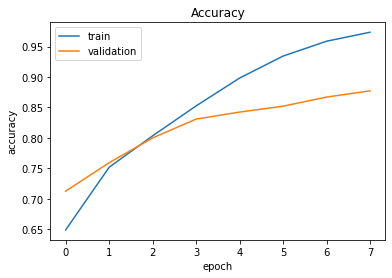

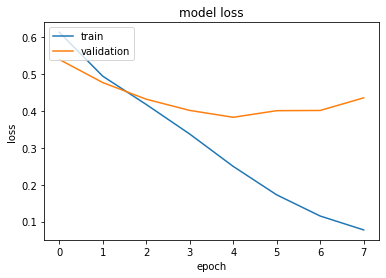

In [ ]:
plt.plot(history_3.history['accuracy'])  
plt.plot(history_3.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_3.history['loss'])  
plt.plot(history_3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations from Bi Directional LSTM from Kaggle Dataset with Glove 50d:**

 - Training accuracy is 97% and 84%.
 - Prediction is good.
 - From the Confusion Matrix
 
  
 |Total |Actual Non Sarcastic |Actual Sarcastic| 
 | --- | --- | --- | 
 |Predicted Non Sarcastic | 5078   |800  |
 |Predicted Sarcastic |  821   |4367   |

 - There are 5899 actual Non SArcastic, but predicted non sarcastics are 5078, So the precision is 86%.

 - There are 5167 actual Sarcastic, but precicted sarcastic headlines are 4367 so the presicion is 85%.

 - There are 5878 predictions as non sarcastics  with 5078 are predicted are actually non sarcastic with the recall of 86%.

 - There are 5188 predictions as sarcastics  with 4367 are predicted as actually  sarcastic with the recall of 84%

- Overall the model is good with the Glove 50d embeddings.


# **Define and Complie a Stacked LSTM model for Kaggle Dataset with Glove 50 d Word Embeddings**

In [ ]:
tf.keras.backend.clear_session()
model_stacked_lstm = tf.keras.Sequential()

In [ ]:
model_stacked_lstm.add(tf.keras.layers.Embedding(num_words_1,
                                    embedding_size, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=20) #Number of words in each review
          )

In [ ]:
model_stacked_lstm.output

<KerasTensor: shape=(None, 20, 50) dtype=float32 (created by layer 'embedding')>

In [ ]:
#LSTM 1
model_stacked_lstm.add(tf.keras.layers.LSTM(200, return_sequences=True))

In [ ]:
#LSTM 2
model_stacked_lstm.add(tf.keras.layers.LSTM(150, return_sequences=True))

In [ ]:
#LSTM 3
model_stacked_lstm.add(tf.keras.layers.LSTM(100))

In [ ]:
model_stacked_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_stacked_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            1438650   
_________________________________________________________________
lstm (LSTM)                  (None, 20, 200)           200800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 150)           210600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,950,551
Trainable params: 511,901
Non-trainable params: 1,438,650
_________________________________________________________________


In [ ]:
#Compile the model
model_stacked_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
check_point_4 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_4 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 3,restore_best_weights=True,mode = 'min')
history_4 = model_stacked_lstm.fit( x=X_train_1, y=Y_train_1, batch_size=32, epochs=10, validation_split=0.3,callbacks=[callback_4,check_point_4])

Epoch 1/10
969/969 [==============================] - 90s 89ms/step - loss: 0.6071 - accuracy: 0.6468 - val_loss: 0.5583 - val_accuracy: 0.7015


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/10
969/969 [==============================] - 86s 89ms/step - loss: 0.5020 - accuracy: 0.7457 - val_loss: 0.4962 - val_accuracy: 0.7543


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 3/10
969/969 [==============================] - 86s 89ms/step - loss: 0.4261 - accuracy: 0.7996 - val_loss: 0.4500 - val_accuracy: 0.7845


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 4/10
969/969 [==============================] - 86s 89ms/step - loss: 0.3483 - accuracy: 0.8459 - val_loss: 0.4531 - val_accuracy: 0.8009
Epoch 5/10
969/969 [==============================] - 86s 89ms/step - loss: 0.2654 - accuracy: 0.8890 - val_loss: 0.3820 - val_accuracy: 0.8384


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 6/10
969/969 [==============================] - 86s 89ms/step - loss: 0.1780 - accuracy: 0.9302 - val_loss: 0.4158 - val_accuracy: 0.8571
Epoch 7/10
969/969 [==============================] - 87s 89ms/step - loss: 0.1140 - accuracy: 0.9591 - val_loss: 0.4433 - val_accuracy: 0.8694
Epoch 8/10
969/969 [==============================] - 87s 89ms/step - loss: 0.0737 - accuracy: 0.9745 - val_loss: 0.4873 - val_accuracy: 0.8793


In [ ]:
model_stacked_lstm.evaluate(X_test_1, Y_test_1)

346/346 [==============================] - 9s 25ms/step - loss: 0.3733 - accuracy: 0.8442


[0.3733484745025635, 0.8442074656486511]

In [ ]:
y_prediction_3 = model_stacked_lstm.predict(X_test_1)

In [ ]:

for i in range(10):
  print("Original Sentiments review - ",Y_test_1[i])

  if(y_prediction_3[i]*100 >65):
    print("Predicted Sentiments review is Sarcastic - ",y_prediction_3[i])
  else:
    print("Predicted Sentiments review is Non Sarcastic - ",y_prediction_3[i])

  print("\n")


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.00099564]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9824254]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.99847716]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9912076]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.00778463]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.94276464]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.8721068]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.33483]


Original Sentiments review -  1
Predicted Sentiments review is Sarcastic -  [0.9881605]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.45855787]




In [ ]:
y_preds_3 = np.where(y_prediction_3>0.65,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(Y_test_1,y_preds_3))

Test Accuracy :  0.8393276703415868


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test_1,y_preds_3))

[[5252  626]
 [1152 4036]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1,y_preds_3,
                            target_names =['Non Sarcastic', 'Sarcastic']))

               precision    recall  f1-score   support

Non Sarcastic       0.82      0.89      0.86      5878
    Sarcastic       0.87      0.78      0.82      5188

     accuracy                           0.84     11066
    macro avg       0.84      0.84      0.84     11066
 weighted avg       0.84      0.84      0.84     11066



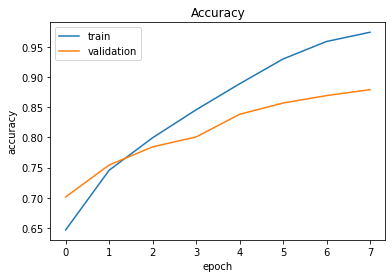

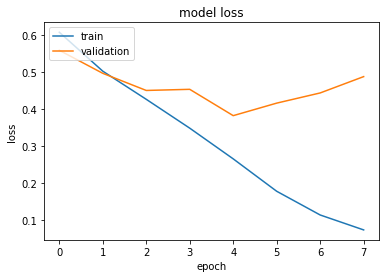

In [ ]:
plt.plot(history_4.history['accuracy'])  
plt.plot(history_4.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_4.history['loss'])  
plt.plot(history_4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations from Bi Directional LSTM from Kaggle Dataset with Glove 50d:**

 - Training accuracy is 97% and 84%.
 - Prediction is good.
 - From the Confusion Matrix
 
  
 |Total |Actual Non Sarcastic |Actual Sarcastic| 
 | --- | --- | --- | 
 |Predicted Non Sarcastic | 5252   |626  |
 |Predicted Sarcastic |  1152   |4036   |

 - There are 6404 actual Non Sarcastic, but predicted non sarcastics are 5252, So the precision is 82%.

 - There are 4662 actual Sarcastic, but precicted sarcastic headlines are 4036 so the presicion is 87%.

 - There are 5878 predictions as non sarcastics  with 5252 are predicted as actually non sarcastic with the recall of 89%.

 - There are 5188 predictions as sarcastics  with 4036 are predicted as actually  sarcastic with the recall of 78%

- Overall the model is good with the Glove 50d embeddings.


# **Define and Complie a Stacked LSTM model for Kaggle Dataset with Glove 300 d Word Embeddings**

In [ ]:
#Stacked LSTM for Glove 300d
tf.keras.backend.clear_session()
model_stacked_lstm_300d = tf.keras.Sequential()

In [ ]:
model_stacked_lstm_300d.add(tf.keras.layers.Embedding(num_words_1,
                                    embedding_size, #Embedding size
                                    weights=[embedding_matrix_1],
                                    trainable=False,
                                    input_length=20) #Number of words in each review
          )

In [ ]:
model_stacked_lstm_300d.output

<KerasTensor: shape=(None, 20, 50) dtype=float32 (created by layer 'embedding')>

In [ ]:
#LSTM 1
model_stacked_lstm_300d.add(tf.keras.layers.LSTM(200, return_sequences=True))

In [ ]:
#LSTM 2
model_stacked_lstm_300d.add(tf.keras.layers.LSTM(150, return_sequences=True))

In [ ]:
#LSTM 3
model_stacked_lstm_300d.add(tf.keras.layers.LSTM(100))

In [ ]:
model_stacked_lstm_300d.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_stacked_lstm_300d.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            1438650   
_________________________________________________________________
lstm (LSTM)                  (None, 20, 200)           200800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 150)           210600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,950,551
Trainable params: 511,901
Non-trainable params: 1,438,650
_________________________________________________________________


In [ ]:
#Compile the model
model_stacked_lstm_300d.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
check_point_5 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_5 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 3,restore_best_weights=True,mode = 'min')
history_5 = model_stacked_lstm_300d.fit( x=X_train_1, y=Y_train_1, batch_size=32, epochs=10, validation_split=0.3,callbacks=[callback_5,check_point_5])

Epoch 1/10
969/969 [==============================] - 94s 90ms/step - loss: 0.6892 - accuracy: 0.5466 - val_loss: 0.6909 - val_accuracy: 0.5389


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/10
969/969 [==============================] - 86s 89ms/step - loss: 0.6889 - accuracy: 0.5466 - val_loss: 0.6901 - val_accuracy: 0.5389


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 3/10
969/969 [==============================] - 86s 89ms/step - loss: 0.6890 - accuracy: 0.5466 - val_loss: 0.6901 - val_accuracy: 0.5389
Epoch 4/10
969/969 [==============================] - 88s 91ms/step - loss: 0.6888 - accuracy: 0.5466 - val_loss: 0.6901 - val_accuracy: 0.5389


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 5/10
969/969 [==============================] - 86s 89ms/step - loss: 0.6889 - accuracy: 0.5466 - val_loss: 0.6904 - val_accuracy: 0.5389
Epoch 6/10
969/969 [==============================] - 86s 89ms/step - loss: 0.6888 - accuracy: 0.5464 - val_loss: 0.6902 - val_accuracy: 0.5389
Epoch 7/10
969/969 [==============================] - 86s 89ms/step - loss: 0.6889 - accuracy: 0.5466 - val_loss: 0.6902 - val_accuracy: 0.5389


In [ ]:
model_stacked_lstm_300d.evaluate(X_test_1, Y_test_1)

346/346 [==============================] - 9s 25ms/step - loss: 0.6913 - accuracy: 0.5312


[0.6913391947746277, 0.5311765670776367]

In [ ]:
y_prediction_4 = model_stacked_lstm_300d.predict(X_test_1)

In [ ]:

for i in range(10):
  print("Original Sentiments review - ",Y_test_1[i])

  if(y_prediction_4[i]*100 >65):
    print("Predicted Sentiments review is Sarcastic - ",y_prediction_4[i])
  else:
    print("Predicted Sentiments review is Non Sarcastic - ",y_prediction_4[i])

  print("\n")


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  0
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]


Original Sentiments review -  1
Predicted Sentiments review is Non Sarcastic -  [0.46055698]




In [ ]:
y_preds_4 = np.where(y_prediction_4>0.65,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(Y_test_1,y_preds_4))

Test Accuracy :  0.531176576902223


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test_1,y_preds_4))

[[5878    0]
 [5188    0]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1,y_preds_4,
                            target_names =['Non Sarcastic', 'Sarcastic']))

               precision    recall  f1-score   support

Non Sarcastic       0.53      1.00      0.69      5878
    Sarcastic       0.00      0.00      0.00      5188

     accuracy                           0.53     11066
    macro avg       0.27      0.50      0.35     11066
 weighted avg       0.28      0.53      0.37     11066



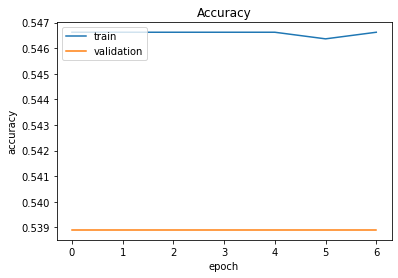

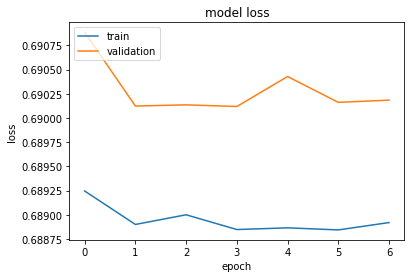

In [ ]:
plt.plot(history_5.history['accuracy'])  
plt.plot(history_5.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_5.history['loss'])  
plt.plot(history_5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations from Stacked LSTM from Kaggle Dataset with Glove 300d:**

 - Training accuracy is 54% and 53%.
 - Prediction is poor.
 - From the Confusion Matrix
 
  
 |Total |Actual Non Sarcastic |Actual Sarcastic| 
 | --- | --- | --- | 
 |Predicted Non Sarcastic | 5878   |0   |
 |Predicted Sarcastic |  5188   |0   |

 - There are 11066 actual Non SArcastic, but predicted non sarcastics are 5878, So the precision is 53%.

 - There are 0 actual Sarcastic, so the presicion is 0.

 - There are 5878 predictions as non sarcastics  with Recall as 100%.

- Overall the model is poor with the Glove 300d embeddings.


# **Tokenize data using Bert Tokenizer**

In [52]:
#Get BertTokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [53]:
sentences = sarcastic_kaggle_df.headline.values

In [54]:
labels = sarcastic_kaggle_df.is_sarcastic.values

In [58]:
tokenized_texts = [tokenizer_bert.tokenize(sent) for sent in sentences]

In [59]:
#We will use only first 200 tokens to do classification (this value can be changed)
max_length = 200
tokenized_texts = [sent[:max_length] for sent in tokenized_texts]

In [60]:
for i in range(len(tokenized_texts)):
    sent = tokenized_texts[i]
    sent = ['[CLS]'] + sent + ['[SEP]']
    tokenized_texts[i] = sent

In [61]:
#Convert tokens into IDs
input_ids = [tokenizer_bert.convert_tokens_to_ids(sent) for sent in tokenized_texts]

In [62]:
#Pad our tokens which might be less than max_length size
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, maxlen=200, truncating='post', padding='post')

# **Split data between training and test**

In [63]:
#80% data will be used for training while 20% will be used for test
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

Create Attention masks : Attention masks are useful to ignore padding tokens. Mask value will be set to 0 for padding tokens and 1 for actual tokens. We will create mask both for training and test data

In [64]:
# Create attention masks for training
train_attn_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in X_train_2:
  seq_mask = [float(i>0) for i in seq]
  train_attn_masks.append(seq_mask)

In [65]:
# Create attention masks for Test
test_attn_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in X_test_2:
  seq_mask = [float(i>0) for i in seq]
  test_attn_masks.append(seq_mask)

# **Define and Build Model:**

In [66]:
model_bert_1 = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
# Prepare training: Compile tf.keras model with optimizer, loss and learning rate schedule 
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_bert_1.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [70]:
model_bert_1.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_56 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [71]:
train_x_data = {'input_ids': np.array(X_train_2), 'attention_mask': np.array(train_attn_masks)}
test_x_data = {'input_ids': np.array(X_test_2), 'attention_mask': np.array(test_attn_masks)}

# **Fit and check the validation accuracy**

In [73]:
check_point_6 = ModelCheckpoint('./checkpoint',monitor='val_loss',save_best_only=True,save_freq='epoch')
callback_6 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights=True,mode = 'min')
history_6 = model_bert_1.fit(train_x_data, Y_train_2, validation_split=0.2, batch_size=16, epochs=2,callbacks=[check_point_6,callback_6])

Epoch 1/2
2214/2214 [==============================] - 987s 437ms/step - loss: 0.2377 - accuracy: 0.9019 - val_loss: 0.1303 - val_accuracy: 0.9547


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


Epoch 2/2
2214/2214 [==============================] - 966s 436ms/step - loss: 0.0636 - accuracy: 0.9791 - val_loss: 0.1044 - val_accuracy: 0.9649


INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


In [74]:
model_bert_1.evaluate(test_x_data, Y_test_2)

346/346 [==============================] - 86s 249ms/step - loss: 0.1045 - accuracy: 0.9664


[0.10448192059993744, 0.9663835167884827]

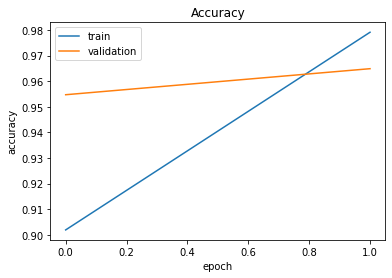

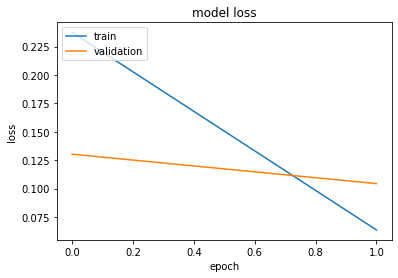

In [84]:
plt.plot(history_6.history['accuracy'])  
plt.plot(history_6.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_6.history['loss'])  
plt.plot(history_6.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations from BERT Transformers Model:**

- Bert Model takes more time for execution and consumes lot of memory hence I have stopped within 2 Epochs.

- Accuracy for Training is 97% and accuracy for Testing is 96%.

- From the graph from Accuracy training and Validation accuracy were increasing for each epoch.

- Loss is getting reduced for each epoch for both validation and training Loss.

- Transformers are really providing a good predictable models on comparing with LSTM's Variant.